<a href="https://colab.research.google.com/github/MassGH2023/Supervised-Machine-Learning-Classification/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer churn dataset.
predict whether customers churn or not churn.

In [11]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [25]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [7]:
len(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [8]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


variables are:

1.   binary,
2.   categorical and not ordinal
3.   categorical and ordinal
4.   numeric



In [20]:
plt.style.use("ggplot")
cp = sns.color_palette()
cp

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

<Axes: ylabel='Frequency'>

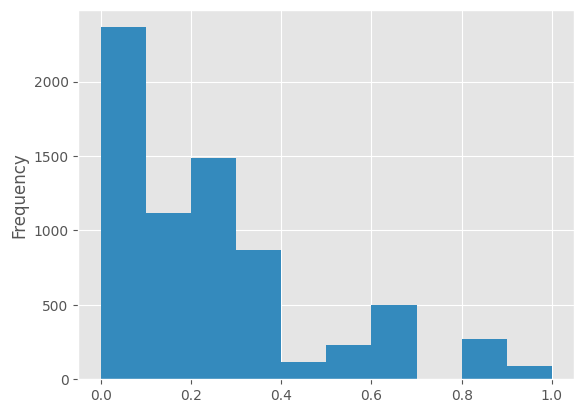

In [21]:
df["gb_mon"].plot(kind = 'hist', color = cp[1])

<Axes: ylabel='Frequency'>

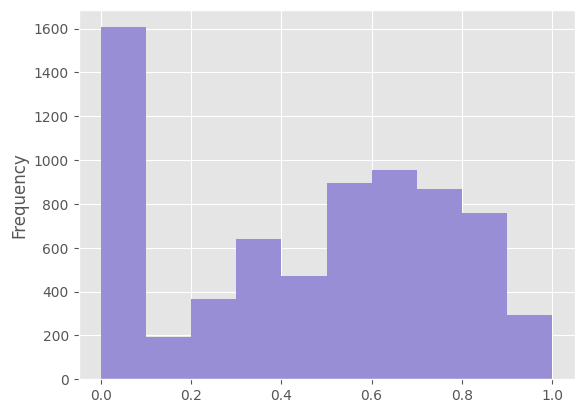

In [22]:
df['monthly'].plot(kind = 'hist', color = cp[2])

In [24]:
df['months'].nunique()

5

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [38]:
df.churn_value.value_counts()

,count
churn_value,
0,5174
1,1869


In [30]:
y = df["churn_value"]
X = df.drop(columns= 'churn_value')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state= 123)

In [62]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2087
           1       0.77      0.73      0.75       731

    accuracy                           0.87      2818
   macro avg       0.84      0.83      0.83      2818
weighted avg       0.87      0.87      0.87      2818



In [41]:
print("Accuracy" , round(accuracy_score(y_test, y_pred),2))

Accuracy 0.87


In [42]:
print("F1 score" , round(f1_score(y_test, y_pred),2))

F1 score 0.75


In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1929,  158],
       [ 196,  535]])

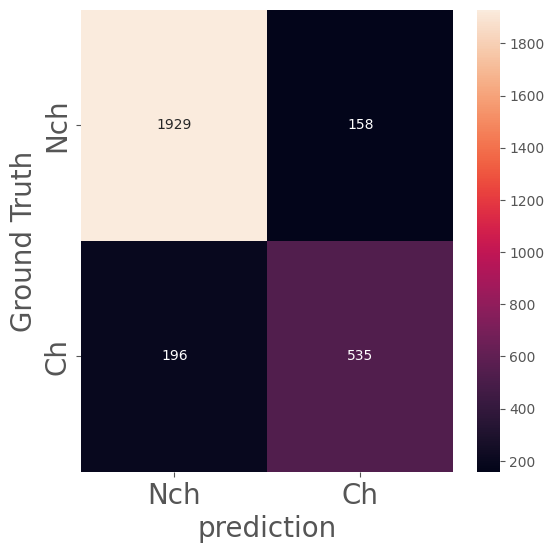

In [61]:
fig, ax = plt.subplots(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = "d",)
labels = ['Nch', "Ch"]
ax.set_xticklabels(labels  , fontsize= 20)
ax.set_yticklabels(labels  , fontsize= 20)
ax.set_ylabel("Ground Truth", fontsize = 20)
ax.set_xlabel("prediction", fontsize = 20)
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2087
           1       0.80      0.71      0.75       731

    accuracy                           0.88      2818
   macro avg       0.85      0.82      0.84      2818
weighted avg       0.88      0.88      0.88      2818



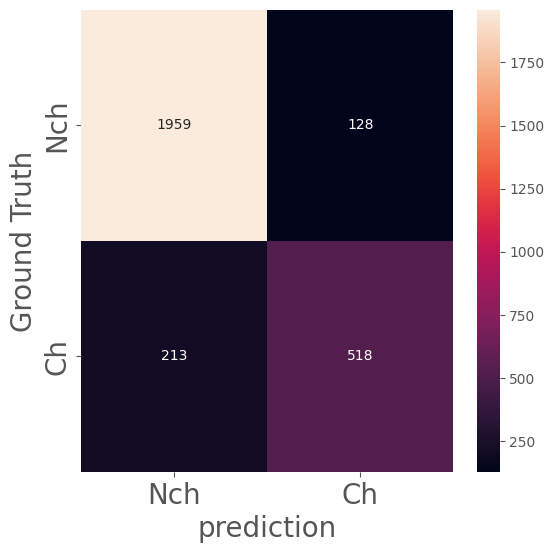

In [64]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = "d",)
labels = ['Nch', "Ch"]
ax.set_xticklabels(labels  , fontsize= 20)
ax.set_yticklabels(labels  , fontsize= 20)
ax.set_ylabel("Ground Truth", fontsize = 20)
ax.set_xlabel("prediction", fontsize = 20)
plt.show()

# Finding the right value for K

In [85]:
f1_scores = []
errors = []

for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors= k, weights = "distance")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  f1_scores.append((k, round(f1_score(y_test, y_pred),4)))
  errors.append((k,1-round(accuracy_score(y_test, y_pred),4)))


pd.DataFrame(f1_scores, columns= ["K", "F1 Score"]);

In [75]:
f1 = pd.DataFrame(f1_scores, columns= ["K", "F1 Score"])

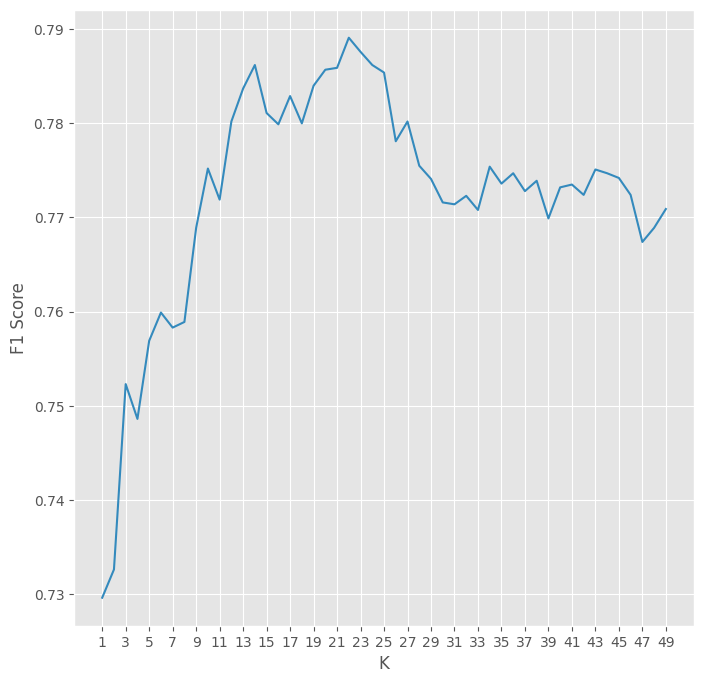

In [84]:
_, ax = plt.subplots(figsize = (8,8))
sns.lineplot(x = f1['K'], y = f1["F1 Score"], color = cp[1])
ax.set_xticks(range(1,50,2))
plt.show()

In [83]:
errors;

In [78]:
e = pd.DataFrame(errors, columns= ["K", "error"])

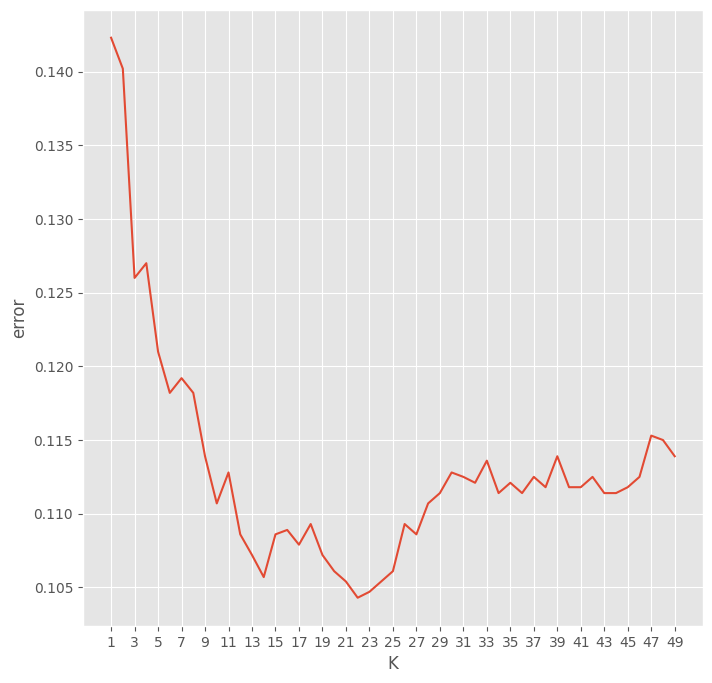

In [82]:
_, ax = plt.subplots(figsize = (8,8))
sns.lineplot(x = e['K'], y = e["error"], color = cp[0])
ax.set_xticks(range(1,50,2))
plt.show()